<a href="https://colab.research.google.com/github/TryHardPranjal/ecommerce-customer-churn-analysis-and-prediction/blob/main/ecommerce_customer_churn_analysis_using_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Librarires

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score,roc_curve, precision_score, recall_score,roc_auc_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore")

## Data Understanding and Exploration

In [3]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
data_dict_df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='Data Dict')

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [6]:
# summary of the dataset: 5630  rows, 20 columns
# dtypes: float64(8), int64(7), object(5)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
# df['Tenure'] = df['Tenure'].astype('object')
# df['CityTier'] = df['CityTier'].astype('object')

In [8]:
# Describe the EComm dataset
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Creating numerical Features list and categorical Features list

In [9]:
datatype_columns = df.dtypes #type of each feature in data: int, float, object
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')]
categorical_columns = datatype_columns[datatype_columns == 'object']

In [10]:
numerical_columns_list = numerical_columns.index
categorical_columns_list = categorical_columns.index
print (f"Numerical Features in dataset: {numerical_columns_list}, \n\n Categorical Features in dataset: {categorical_columns_list}")

Numerical Features in dataset: Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object'), 

 Categorical Features in dataset: Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


### Missing Value Ananlysis

In [11]:
# Ratio of columns having null values (out of 1)
round((pd.isnull(df).sum() * 100/len(df.index)),2)[pd.isnull(df).sum() > 0].sort_values()

WarehouseToHome                4.46
HourSpendOnApp                 4.53
CouponUsed                     4.55
OrderCount                     4.58
Tenure                         4.69
OrderAmountHikeFromlastYear    4.71
DaySinceLastOrder              5.45
dtype: float64

## Exploratory Data Analysis

In [12]:
sub_categorical_cols = ['Tenure', 'CityTier', 'PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

In [13]:
df_churn = df[df["Churn"] == 1]

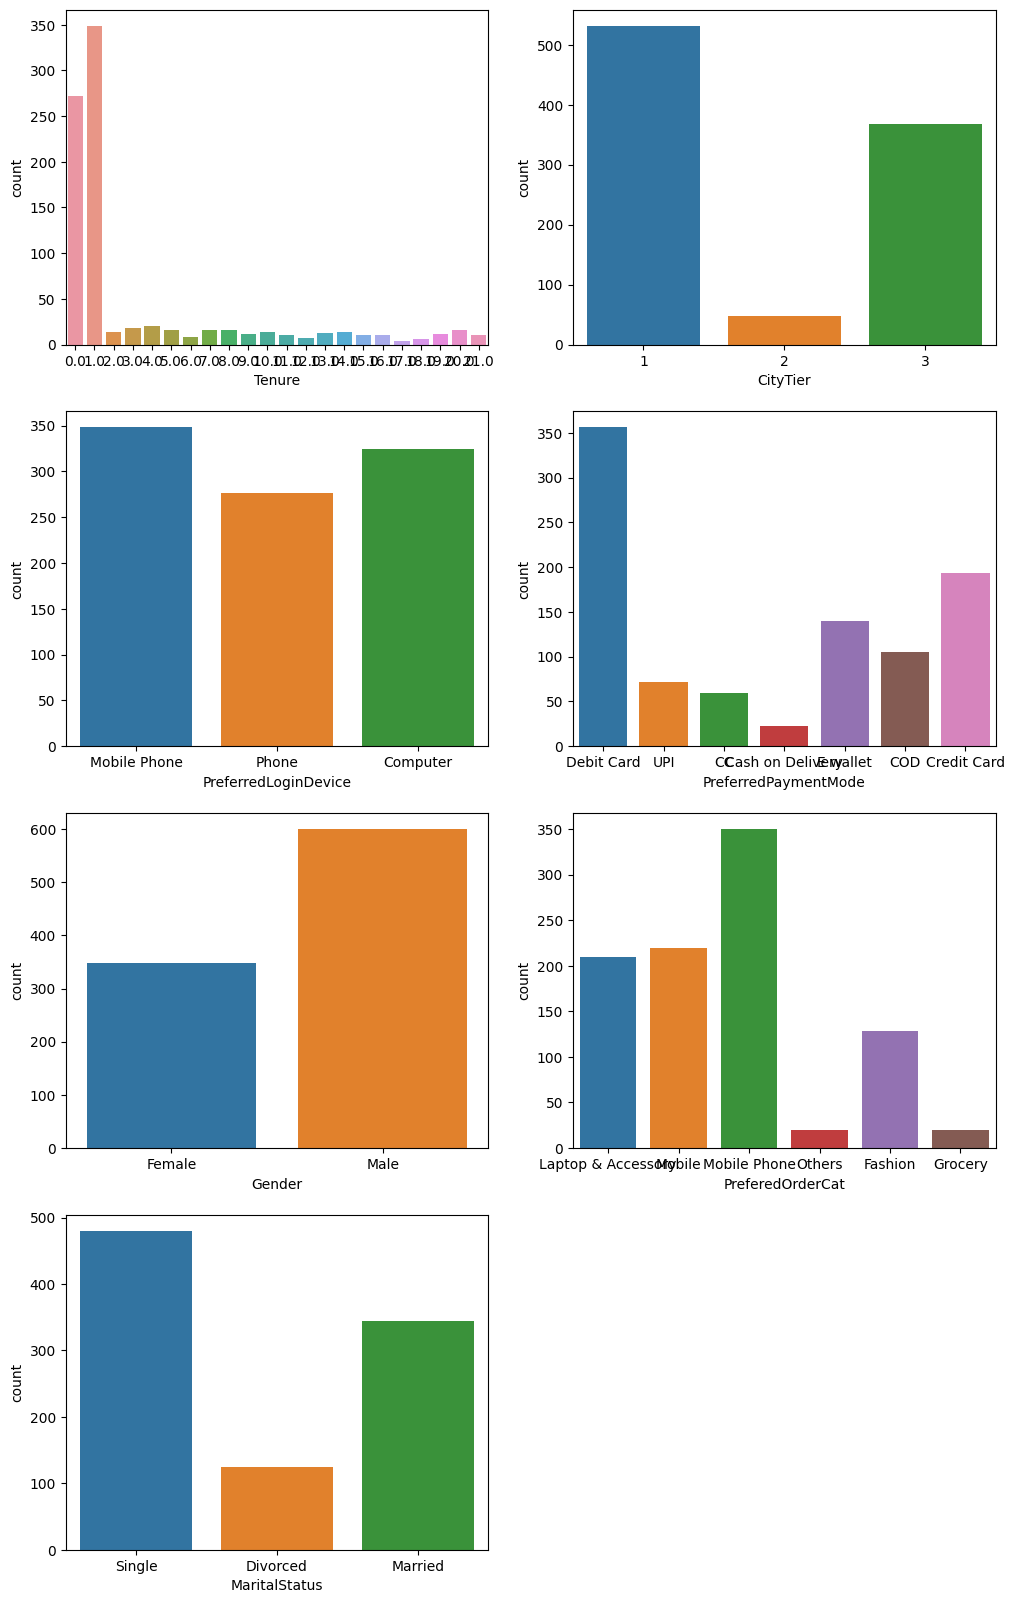

In [14]:
plt.figure(figsize=(12, 20))
idx=1

for column in sub_categorical_cols:
    plt.subplot(4, 2, idx)
    sns.countplot(data=df_churn, x=column)
    idx = idx + 1
plt.show()

<Figure size 2500x1500 with 0 Axes>

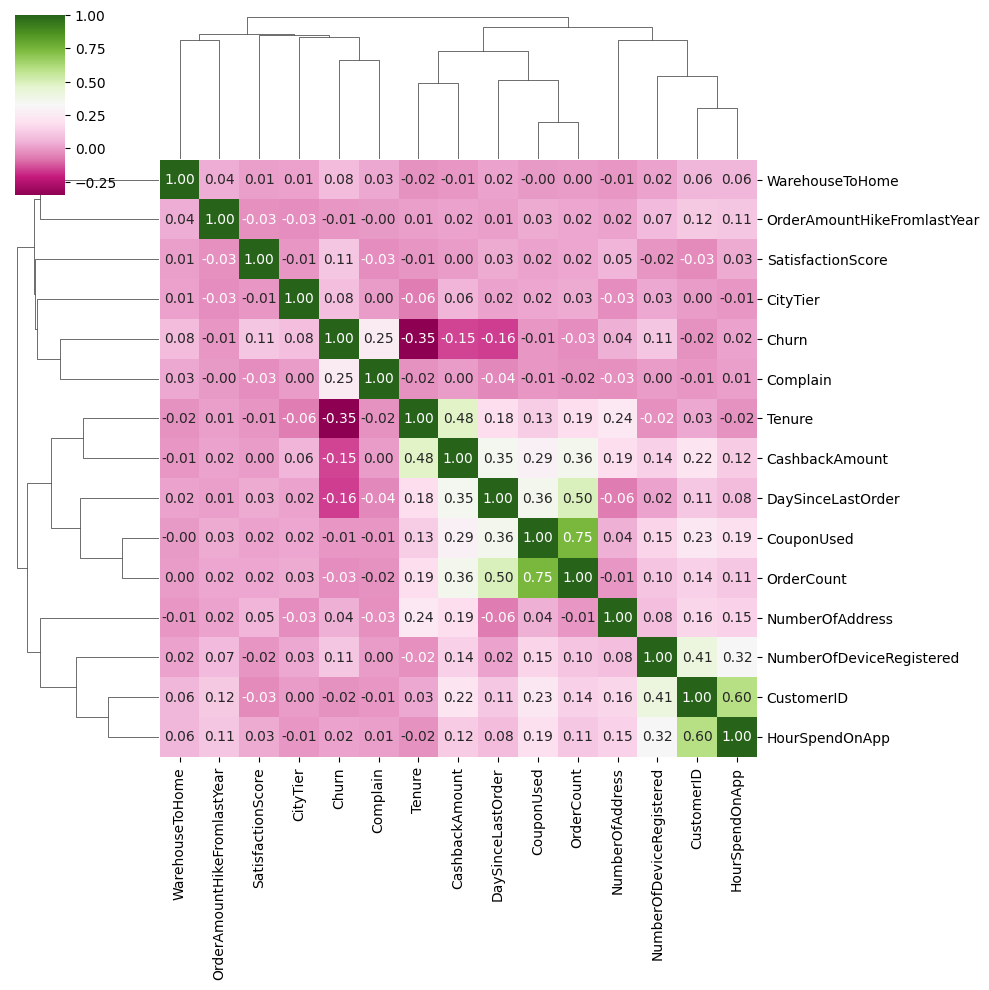

In [15]:
# checking correlation among different numerical variables using clustered heat map

plt.figure(figsize=(25,15))
sns.clustermap(df.corr(), cmap='PiYG', annot=True, fmt=".2f")
plt.show()

## Data Preparation / Preprocessing

In [16]:
class Preprocessing:
    def __init__(self, df):
        self.df = df

    def shape(self):
        print(f'shape: {self.df.shape}')

    def dtypes(self, pr=False):
        print("Types")
        if pr:
            print(self.df.dtypes)

    def supposed2beint(self):
        float_cols = [column for column in self.df.columns if self.df[column].dtype == 'float']
        int2be_cols = []
        for col in float_cols:
            if (self.df[col].fillna(-9999) % 1  == 0).all() == True:
                int2be_cols.append(col)
        return int2be_cols

    def isNaN(self, pr=False):
        if pr:
            print("Contain NaN")
            print(self.df.isnull().sum())
        else:
            return self.df.columns[self.df.isna().any()].tolist()

    def isObject(self):
        return [column for column in self.df.columns if self.df[column].dtype == 'object']

    def check_dataframe(self):
        self.shape()
        self.dtypes(True)
        self.isNaN(True)

    def fillNaN(self):
        nan_cols = self.isNaN()
        int2be_cols = self.supposed2beint()
        # nan_cols == int2be_cols they are the same
        for col in int2be_cols:
            self.df[col].fillna(round(self.df[col].mean()), inplace=True)
            self.df[col] = self.df[col].astype(int)

    def adjust_category_cols(self):
        self.fillNaN()
        #PreferredLoginDevice
        # self.df.loc[self.df["PreferredLoginDevice"] == "Mobile Phone", "PreferredLoginDevice"] = "Phone"
        #PreferredPaymentMode
        # self.df.loc[self.df["PreferredPaymentMode"] == "Credit Card", "PreferredPaymentMode"] = "CC"
        # self.df.loc[self.df["PreferredPaymentMode"] == "Cash on Delivery", "PreferredPaymentMode"] = "COD"
        self.adjust_duplicate_column_values(self.df)

    def adjust_duplicate_column_values(self, _df):
        #PreferredLoginDevice
        _df.loc[_df["PreferredLoginDevice"] == "Mobile Phone", "PreferredLoginDevice"] = "Phone"
        #PreferredPaymentMode
        _df.loc[_df["PreferredPaymentMode"] == "Credit Card", "PreferredPaymentMode"] = "CC"
        _df.loc[_df["PreferredPaymentMode"] == "Cash on Delivery", "PreferredPaymentMode"] = "COD"

    def drop_useless_cols(self):
        self.df.drop(['CustomerID'], axis=1, inplace=True)

    def split_target(self):
        self.adjust_category_cols()
        self.drop_useless_cols()
        self.X = self.df.drop('Churn', axis=1)
        self.y = self.df['Churn'].astype(int).to_numpy()

    def find_enc_method(self):
        cat_cols = self.isObject()
        one_hot_cols = [col for col in cat_cols if self.X[col].nunique() <=3]
        label_enc_cols = [col for col in cat_cols if col not in one_hot_cols]
        self.cat_cols = cat_cols
        self.one_hot_cols = one_hot_cols
        self.label_enc_cols = label_enc_cols
        return one_hot_cols, label_enc_cols, cat_cols

    def encoding(self):
        one_hot_cols, label_enc_cols, cat_cols = self.find_enc_method()
        num_cols = [col for col in self.X.columns if col not in cat_cols]
        self.num_cols = num_cols
        X_OHE, X_LE, X_NUM = self.X[one_hot_cols].copy(), self.X[label_enc_cols].copy(), self.X[num_cols].copy()
        self.OHE = OneHotEncoder(drop='first', handle_unknown='error')
        X_OHE = self.OHE.fit_transform(X_OHE).toarray()
        self.le_dict = {}
#         self.LE = LabelEncoder()
        for col in X_LE.columns:
            LE = LabelEncoder()
            self.le_dict[col] = LE.fit(X_LE[col])
            X_LE[col] = self.le_dict[col].transform(X_LE[col])
        return X_OHE, X_LE.to_numpy(), X_NUM.to_numpy()

    def scaling(self):
        X_OHE, X_LE, X_num = self.encoding()
        self.SS = StandardScaler()
        X_num = self.SS.fit_transform(X_num)
        self.X_total = np.concatenate((X_OHE, X_LE, X_num), axis=1)

    def get_encoders(self):
        return self.OHE, self.LE, self.le_dict

    def get_scaler(self):
        return self.SS

    def get_default_Xy(self):
        self.split_target()
        return self.X, self.y

    def get_Xy(self):
        self.split_target()
        self.scaling()
        return self.X_total, self.y

    def prepare_unseen_df(self, unseen_df):
        """
        Used for scoring new unseen data
        """
        cat_cols = self.cat_cols
        num_cols = self.num_cols
        one_hot_cols = self.one_hot_cols
        label_enc_cols = self.label_enc_cols

        self.adjust_duplicate_column_values(unseen_df)

        X_OHE, X_LE, X_NUM = unseen_df[one_hot_cols].copy(), unseen_df[label_enc_cols].copy(), unseen_df[num_cols].copy()
        X_OHE = self.OHE.transform(X_OHE).toarray()
        for col in X_LE.columns:
            X_LE[col] = self.le_dict[col].transform(X_LE[col])

        X_num = self.SS.transform(X_NUM.to_numpy())
        return np.concatenate((X_OHE, X_LE.to_numpy(), X_num), axis=1)


In [17]:
pre = Preprocessing(df)
X, y = pre.get_Xy()

In [18]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1]), array([4682,  948]))

In [20]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


In [21]:
import optuna
from xgboost import XGBClassifier

In [22]:
def objective_xgb(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': trial.suggest_categorical("n_estimators", [150, 200, 300, 3000]),
        'max_depth': trial.suggest_categorical('max_depth', [4,5,7,9,11,13,15,17]),
        'random_state': 42,
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBClassifier(**param)
    model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test, y_test)], verbose=False)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)

    return acc


In [23]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=50)
params_xgb = study.best_trial.params
print('Number of finished trials:', len(study.trials))
print('Best trial:', params_xgb)

[I 2023-07-22 12:56:09,552] A new study created in memory with name: no-name-468bca63-1c8f-49fb-aeef-b015b5a872a1
[I 2023-07-22 12:56:14,954] Trial 0 finished with value: 0.8318531675547661 and parameters: {'lambda': 5.178238000744189, 'alpha': 0.7711168369987594, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.012, 'n_estimators': 150, 'max_depth': 7, 'min_child_weight': 230}. Best is trial 0 with value: 0.8318531675547661.
[I 2023-07-22 12:56:23,463] Trial 1 finished with value: 0.866785079928952 and parameters: {'lambda': 0.02756816059060735, 'alpha': 0.004371194669906963, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.014, 'n_estimators': 300, 'max_depth': 4, 'min_child_weight': 138}. Best is trial 1 with value: 0.866785079928952.
[I 2023-07-22 12:56:31,833] Trial 2 finished with value: 0.9023090586145648 and parameters: {'lambda': 1.869689228655845, 'alpha': 0.08270561382607895, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.008, 'n_esti

Number of finished trials: 50
Best trial: {'lambda': 0.6873434345341471, 'alpha': 0.019045818134077262, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.02, 'n_estimators': 3000, 'max_depth': 9, 'min_child_weight': 5}


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = XGBClassifier(**params_xgb)
model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test, y_test)], verbose=False)
y_pred = model.predict(X_test)


### Model Evaluation

In [25]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print("="*60)
print(f"Recall: {round(recall_score(y_pred, y_test),2)}")
print("="*60)
print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
print("="*60)
print(f"F1: {round(f1_score(y_pred, y_test), 2)}")
print("="*60)
print(f"Auc: {round(roc_auc_score(y_pred, y_test), 2)}")
print("="*60)
CR = classification_report(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)
print(f"Classification Report:\n {CR}")
print("="*60)
print("\n")
print(f"Confusion Matrix: {CM}")
print("="*60)

Accuracy: 0.97
Recall: 0.95
Precision: 0.88
F1: 0.91
Auc: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1405
           1       0.95      0.88      0.91       284

    accuracy                           0.97      1689
   macro avg       0.96      0.93      0.95      1689
weighted avg       0.97      0.97      0.97      1689



Confusion Matrix: [[1391   14]
 [  35  249]]


# Prediction using realtime data

In [26]:
def evaluate_churn(eva_dict):
    scoring_df = pd.DataFrame.from_records([scoring_dict])

    preprocessed_df = pre.prepare_unseen_df(scoring_df)

    test_pred_arr = model.predict([preprocessed_df[0]])
    test_pred_proba = model.predict_proba([preprocessed_df[0]])

    will_churn = "Yes" if test_pred_arr[0] == 1 else "No"
    print("is the customer will churn - ", will_churn)
    print(f"Probability for will not churn: {test_pred_proba[0][0]}, will churn: {test_pred_proba[0][1]}")

    return (will_churn, test_pred_proba[0])

In [27]:
scoring_dict = {
  'Tenure': 5,
  'PreferredLoginDevice': 'Computer',
  'CityTier': 3,
  'WarehouseToHome': 0,
  'PreferredPaymentMode': 'Debit Card',
  'Gender': 'Male',
  'HourSpendOnApp': 0,
  'NumberOfDeviceRegistered': 0,
  'PreferedOrderCat': 'Mobile',
  'SatisfactionScore': 10,
  'MaritalStatus': 'Married',
  'NumberOfAddress': 3,
  'Complain': 100,
  'OrderAmountHikeFromlastYear': 13,
  'CouponUsed': 0,
  'OrderCount': 0,
  'DaySinceLastOrder': 300,
  'CashbackAmount': 0
}

In [28]:
evaluate_churn(scoring_dict)

is the customer will churn -  No
Probability for will not churn: 0.6063071489334106, will churn: 0.39369288086891174


('No', array([0.60630715, 0.39369288], dtype=float32))